In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import os
import PIL
from PIL import Image
import pathlib

In [3]:
## /Users/malikagolshan/Desktop/class_massive
from pathlib import Path
DATASET_PATH = pathlib.Path('/Users/malikagolshan/Desktop/class_massive')

In [4]:
import matplotlib.pyplot as plt

In [5]:
from keras.preprocessing.image import ImageDataGenerator


In [6]:
side_len = 128

In [7]:
train_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z15',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=8,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    
)

valid_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z15',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=8,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
 
)

Found 26991 files belonging to 2 classes.
Using 21593 files for training.
Metal device set to: Apple M1


2022-06-03 20:06:02.553578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-03 20:06:02.554196: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 26991 files belonging to 2 classes.
Using 5398 files for validation.


2022-06-03 20:06:06.881727: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-03 20:06:06.883820: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


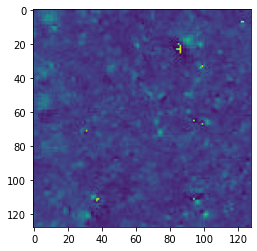

In [8]:
plt.imshow(np.squeeze(next(iter(valid_gen))[0][0]/255))

In [10]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

class Gray2VGGInput( Layer ) :
    
    """Custom conversion layer
    """
    def build( self, x ) :
        self.built = True
        return

    def call( self, x ) :
        rgb_x = K.concatenate( [x,x,x], axis=-1 )
        norm_x = rgb_x
        return norm_x

    def compute_output_shape( self, input_shape ) :
        return input_shape[:3] + (3,)

In [78]:
# import noise layer
#from keras.layers import GaussianNoise
# define noise layer


In [18]:
#for layer in base_model.layers: 
 # layer.trainable = False
  #print('Layer ' + layer.name + ' frozen.')



inputs          = keras.Input(shape=(side_len, side_len,1))
vgg_input_image = Gray2VGGInput( name='gray_to_rgb_norm')(inputs)
x               = vgg_input_image
scale_layer     = keras.layers.experimental.preprocessing.Rescaling(scale=1./255)



base_model = Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(8, activation="hard_sigmoid"),
    ]
)



x = scale_layer(x)
x = base_model(x, training=False)
#x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(8, activation='relu')(x)
#x = keras.layers.GaussianNoise(0.1)(x)
outputs = keras.layers.Dense(1)(x)
model   = keras.Model(inputs, outputs)
    


In [19]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.0003),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [20]:
model.predict(train_gen, steps=4)

2022-06-03 20:12:17.058155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.56293976],
       [0.55314   ],
       [0.56612015],
       [0.566041  ],
       [0.5604494 ],
       [0.5648732 ],
       [0.5534937 ],
       [0.5587828 ],
       [0.56479275],
       [0.5639835 ],
       [0.57045346],
       [0.56792915],
       [0.5717473 ],
       [0.5639866 ],
       [0.5628581 ],
       [0.5595964 ],
       [0.5675869 ],
       [0.5579092 ],
       [0.55035263],
       [0.56197107],
       [0.55833   ],
       [0.55947375],
       [0.5594113 ],
       [0.56288123],
       [0.55571324],
       [0.5592637 ],
       [0.5712552 ],
       [0.56930184],
       [0.5627879 ],
       [0.5525742 ],
       [0.55353916],
       [0.55542254]], dtype=float32)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
gray_to_rgb_norm (Gray2VGGIn (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0     

In [24]:
model.fit(train_gen, epochs=1, validation_data=valid_gen) ### when I set weights to NONE I get the exact same acuraacy

2700/2700 [==============================] - ETA: 0s - loss: 9.5798e-04 - binary_accuracy: 1.0000

2022-06-03 20:21:30.842773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2700/2700 [==============================] - 85s 32ms/step - loss: 9.5798e-04 - binary_accuracy: 1.0000 - val_loss: 3.5036e-04 - val_binary_accuracy: 1.0000


In [25]:
model.predict(train_gen, steps=4)

array([[ 7.9850254],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [-7.961264 ],
       [ 7.9850254],
       [-7.961264 ],
       [ 7.9850254],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [-7.961264 ],
       [-7.961264 ],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [-7.961264 ],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [-7.961264 ],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [ 7.9850254],
       [ 7.9850254],
       [-7.961264 ],
       [-7.961264 ],
       [-7.961264 ]], dtype=float32)

In [44]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in valid_gen:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [47]:
true_categories = tf.concat([y for x, y in valid_gen], axis=0)

In [49]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(correct_labels, predicted_labels, normalize=None)

print(c_m)


[[3188    0]
 [2210    0]]


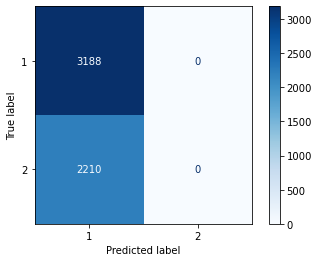

[100.   0.]


In [55]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
disp = ConfusionMatrixDisplay(confusion_matrix=c_m,
                             display_labels= '12')
disp.plot(cmap= 'Blues')
plt.show()

matrix = (c_m.diagonal()/c_m.sum(axis=1))*100
print(matrix)